In [1]:
# 쥬피터노트북 셀 스타일 조절 
from IPython.core.display import display, HTML
display(HTML("<style>.container { font-weight: bold !important; }</style>"))
display(HTML("<style>.container { width: 100% !important; }</style>"))

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 판다스에서 기술통계 수치 확인하기 

- 데이타프레임명.describe()

In [3]:
df = pd.read_csv('data/data.csv')
df

,class,name,kor,eng,mat,bio
0,1,adam,67,87,90,98
1,1,andrew,45,45,56,98
2,1,ben,95,59,96,88
3,1,clark,65,94,89,98
4,1,dan,45,65,78,98
5,1,noel,78,76,98,89
6,2,paul,87,67,65,56
7,2,walter,89,98,78,78
8,2,oscar,100,78,56,65
9,2,martin,99,89,87,87


In [4]:
df.shape

(12, 6)

In [5]:
df.describe()

,class,kor,eng,mat,bio
count,12.000000,12.0000,12.000000,12.000000,12.000000
mean,1.500000,77.7500,74.333333,78.000000,82.250000
std,0.522233,20.1184,18.217541,15.874508,16.276726
min,1.000000,45.0000,45.000000,56.000000,54.000000
25%,1.000000,65.0000,63.500000,62.750000,74.750000
50%,1.500000,82.5000,77.000000,82.500000,87.500000
75%,2.000000,95.7500,89.000000,89.250000,98.000000
max,2.000000,100.0000,98.000000,98.000000,98.000000


In [6]:
# 국어, 수학의 통계 정보만 출력 
df[['kor', 'mat']].describe()

,kor,mat
count,12.0000,12.000000
mean,77.7500,78.000000
std,20.1184,15.874508
min,45.0000,56.000000
25%,65.0000,62.750000
50%,82.5000,82.500000
75%,95.7500,89.250000
max,100.0000,98.000000


In [8]:
# 평균, 표준편차 만 출력 1
df.describe().loc['mean':'std']

,class,kor,eng,mat,bio
mean,1.500000,77.7500,74.333333,78.000000,82.250000
std,0.522233,20.1184,18.217541,15.874508,16.276726


In [9]:
# 평균, 표준편차 만 출력 2
df.describe().iloc[1:3]

,class,kor,eng,mat,bio
mean,1.500000,77.7500,74.333333,78.000000,82.250000
std,0.522233,20.1184,18.217541,15.874508,16.276726


In [10]:
# 국어, 수학의 평균, 표준편차 만 출력 
df.describe().loc['mean':'std', ['kor', 'mat']]

,kor,mat
mean,77.7500,78.000000
std,20.1184,15.874508


### 퀴즈 

25%, 50%, 75% 데이타만 출력하기 (1열 class 제외) 

In [17]:
df.describe().loc['25%':'75%', 'kor':]

,kor,eng,mat,bio
25%,65.00,63.5,62.75,74.75
50%,82.50,77.0,82.50,87.50
75%,95.75,89.0,89.25,98.00


In [15]:
df.describe().loc['25%':'75%', 'kor':'bio']

,kor,eng,mat,bio
25%,65.00,63.5,62.75,74.75
50%,82.50,77.0,82.50,87.50
75%,95.75,89.0,89.25,98.00


In [21]:
df.describe().loc[['25%','50%','75%'], ['kor','mat','eng','bio']]

,kor,mat,eng,bio
25%,65.00,62.75,63.5,74.75
50%,82.50,82.50,77.0,87.50
75%,95.75,89.25,89.0,98.00


In [16]:
df.describe().iloc[4:7, 1:]

,kor,eng,mat,bio
25%,65.00,63.5,62.75,74.75
50%,82.50,77.0,82.50,87.50
75%,95.75,89.0,89.25,98.00


In [18]:
# kor 열만 
df.describe().iloc[4:7, 1]

25%    65.00
50%    82.50
75%    95.75
Name: kor, dtype: float64

### 데이타프레임에서 상관계수 

- 데이타프레임.corr()

In [23]:
print(dir(pd))

['BooleanDtype', 'Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Flags', 'Float32Dtype', 'Float64Dtype', 'Float64Index', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int64Index', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NA', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseDtype', 'StringDtype', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt64Index', 'UInt8Dtype', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__getattr__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_hashtable', '_is_numpy_dev', '_lib', '_libs', '_np_version_under1p17', '_np_version_under1p18', '_testing', '_tslib', '_typing', '_version', 'api', 'array', 'arrays', 'bda

In [24]:
df = pd.read_csv('data/data.csv')
df

,class,name,kor,eng,mat,bio
0,1,adam,67,87,90,98
1,1,andrew,45,45,56,98
2,1,ben,95,59,96,88
3,1,clark,65,94,89,98
4,1,dan,45,65,78,98
5,1,noel,78,76,98,89
6,2,paul,87,67,65,56
7,2,walter,89,98,78,78
8,2,oscar,100,78,56,65
9,2,martin,99,89,87,87


In [25]:
df.corr()

,class,kor,eng,mat,bio
class,1.000000,0.618665,0.191110,-0.427669,-0.807464
kor,0.618665,1.000000,0.105666,-0.060346,-0.664130
eng,0.191110,0.105666,1.000000,0.532828,0.210930
mat,-0.427669,-0.060346,0.532828,1.000000,0.563289
bio,-0.807464,-0.664130,0.210930,0.563289,1.000000


In [26]:
df.loc[:,'kor':'bio'].corr()

,kor,eng,mat,bio
kor,1.000000,0.105666,-0.060346,-0.664130
eng,0.105666,1.000000,0.532828,0.210930
mat,-0.060346,0.532828,1.000000,0.563289
bio,-0.664130,0.210930,0.563289,1.000000


### seaborn의 히트맵 

- sns.heatmap(data, annote=True, cmap=색상팔레트)
- https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html

In [28]:
sns.heatmap?

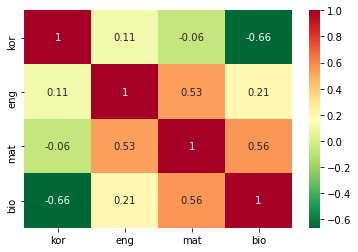

In [33]:
sns.heatmap(df.loc[:,'kor':'bio'].corr(), annot=True, cmap='RdYlGn_r');

## seaborn에서 제공하는 데이타셋 활용 

데이타프레임명 = sns.load_dataset(데이타셋명)
```
iris # 붓꽃데이타 
titanic # 타이타닉 
tips # 레스토랑 팁
flights # 승객 데이타 
```

In [34]:
flights = sns.load_dataset('flights')
flights.shape

(144, 3)

In [35]:
flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


In [36]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


In [37]:
flights.corr()

,year,passengers
year,1.000000,0.921824
passengers,0.921824,1.000000


In [39]:
flights.corr().loc['year', 'passengers'], flights.corr().iloc[0, 1]

(0.9218238352924211, 0.9218238352924211)

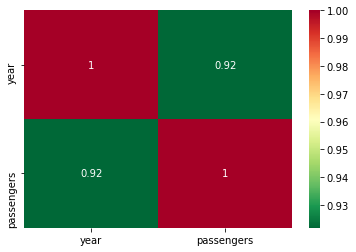

In [40]:
sns.heatmap(flights.corr(), annot=True, cmap='RdYlGn_r');

# 피봇테이블을 이용해서 데이타프레임 구조 변경하기 
- 데이타프레임.pivot(행, 열, 값)

In [42]:
flights2 = flights.pivot('month', 'year', 'passengers')
flights2

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


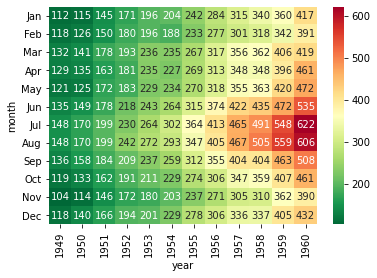

In [48]:
sns.heatmap(flights2, annot=True, cmap='RdYlGn_r', fmt='d');

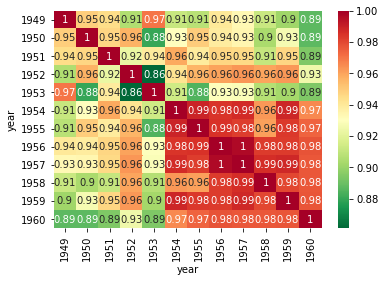

In [50]:
sns.heatmap(flights2.corr(), annot=True, cmap='RdYlGn_r');